# Подготовка, изучение и предобработка данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/ds_salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [ ]:
df.shape

(3755, 11)

В датасете 10 фичей:

 • work_year: год работы

 • experience_level: уровень опыта (Junior, Senior, или Lead)

 • employment_type: тип занятости (Full-time или Contract)

 • job_title: должность (Data Analyst, Data Scientist и т.д.)

 • salary: зарплата

 • salary_currency: валюта

 • employee_residence: страна или регион, где проживает сотрудник

 • remote_ratio: процент занятости

 • company_location: страна компании

 • company_size: размер компании (Small, Medium или Large)

In [ ]:
df = df.drop(columns = ['salary'])

In [ ]:
if (any(df.duplicated()) == True):
  print('есть дубликаты')
else:
  print('нет дубликатов')

if (any(df.isna().any()) == True):
  print('есть пропуски')
else:
  print('нет пропусков')

есть дубликаты
нет пропусков


In [ ]:
df = df.drop_duplicates()

if (any(df.duplicated()) == True):
  print('есть дубликаты')
else:
  print('нет дубликатов')

нет дубликатов


In [ ]:
df.shape

(2584, 10)

In [ ]:
df.describe()

,work_year,salary_in_usd,remote_ratio
count,2584.000000,2584.000000,2584.000000
mean,2022.301084,133409.280186,50.483746
std,0.749179,67136.837329,48.163707
min,2020.000000,5132.000000,0.000000
25%,2022.000000,84975.000000,0.000000
50%,2022.000000,130000.000000,50.000000
75%,2023.000000,175000.000000,100.000000
max,2023.000000,450000.000000,100.000000




---



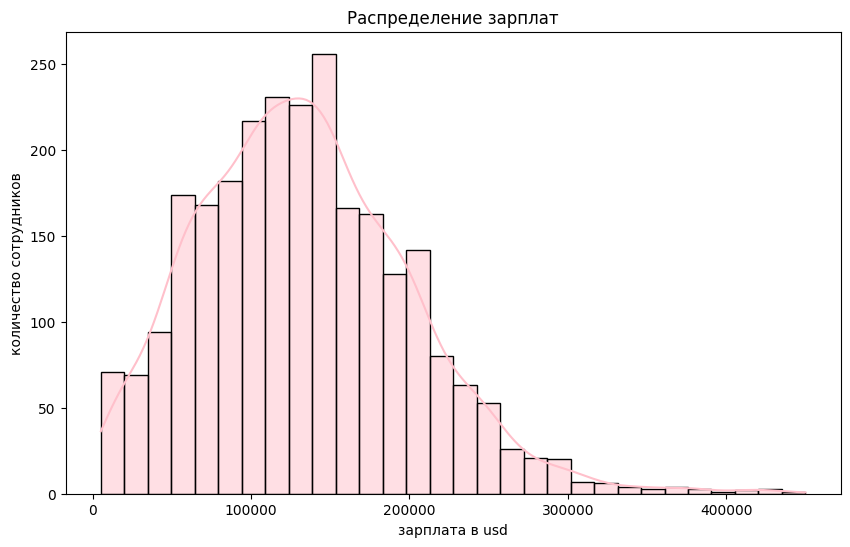

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], bins=30, kde=True, color='pink')
plt.xlabel('зарплата в usd')
plt.ylabel('количество сотрудников')
plt.title('Распределение зарплат')
plt.show()

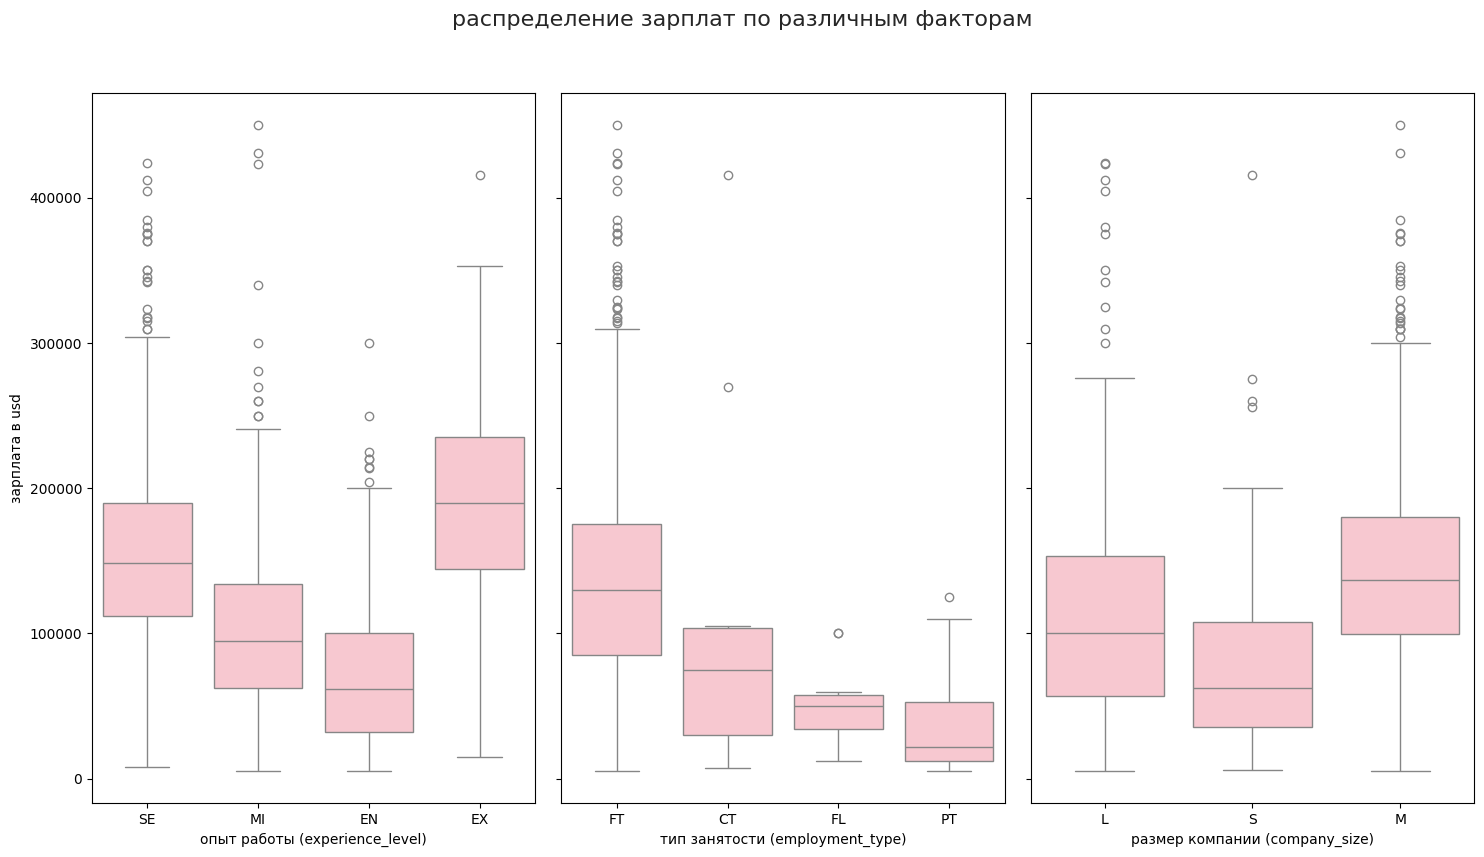

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 9), sharey=True)

sns.set(style="whitegrid")
sns.set_palette("pastel")

sns.boxplot(x='experience_level', y='salary_in_usd', data=df, ax=axes[0], color='pink')
axes[0].set_ylabel('зарплата в usd')
axes[0].set_xlabel('опыт работы (experience_level)')
axes[0].set_xticklabels(axes[0].get_xticklabels())

sns.boxplot(x='employment_type', y='salary_in_usd', data=df, ax=axes[1], color='pink')
axes[1].set_xlabel('тип занятости (employment_type)')
axes[1].set_xticklabels(axes[1].get_xticklabels())

sns.boxplot(x='company_size', y='salary_in_usd', data=df, ax=axes[2], color='pink')
axes[2].set_xlabel('размер компании (company_size)')
axes[2].set_xticklabels(axes[2].get_xticklabels())

plt.suptitle('распределение зарплат по различным факторам', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

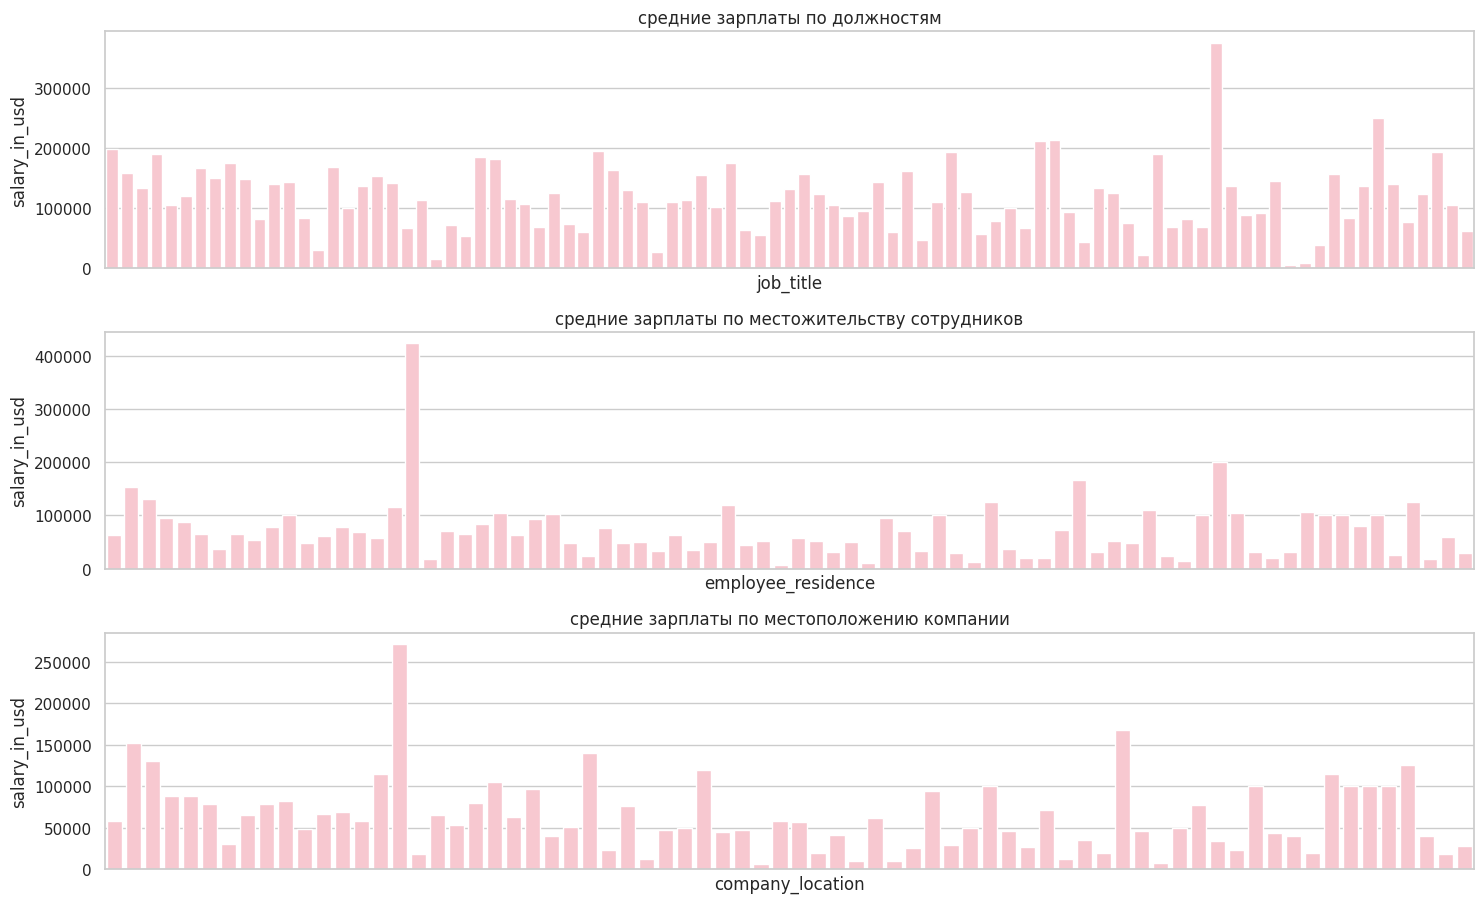

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(15, 10), sharex=False)

sns.barplot(x='job_title', y='salary_in_usd', data=df, ax=axes[0], ci=None, color='pink')
axes[0].set_title('cредние зарплаты по должностям')
axes[0].set_xticks([])

sns.barplot(x='employee_residence', y='salary_in_usd', data=df, ax=axes[1], ci=None, color='pink')
axes[1].set_title('cредние зарплаты по местожительству сотрудников')
axes[1].set_xticks([])


sns.barplot(x='company_location', y='salary_in_usd', data=df, ax=axes[2], ci=None, color='pink')
axes[2].set_title('cредние зарплаты по местоположению компании')
axes[2].set_xticks([])


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Исследование корреляции и дальнейшая предобработка данных

In [ ]:
df.nunique()

work_year                4
experience_level         4
employment_type          4
job_title               93
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder

X = df.drop(columns = ['salary_in_usd'])
y = df['salary_in_usd']

encoder = OneHotEncoder(handle_unknown='infrequent_if_exist')

X_encoded = encoder.fit_transform(X)

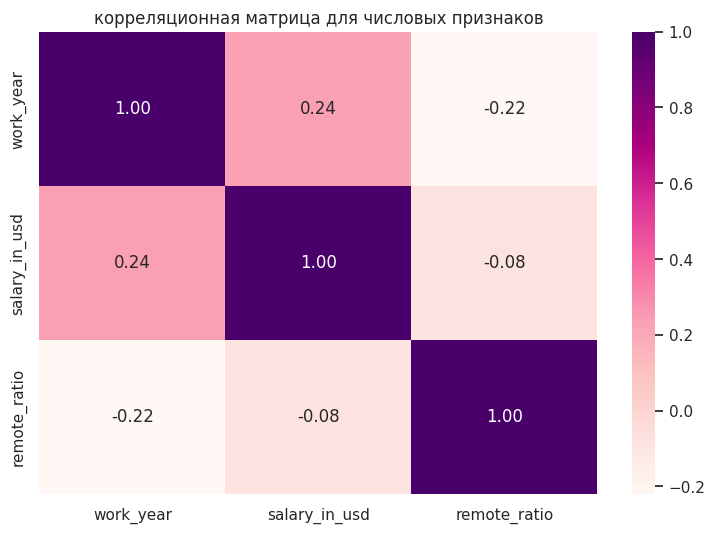

In [ ]:
numerical_columns = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(9, 6))
sns.heatmap(df[numerical_columns].corr(), annot=True, fmt=".2f", cmap='RdPu')
plt.title('корреляционная матрица для числовых признаков')
plt.show()

после кодирования данных X_encoded - разреженная матрица, а для создания корреляционной матрицы нужна плотная матрица

In [ ]:
X_encoded_arr = X_encoded.toarray()
X_encoded_df = pd.DataFrame(X_encoded_arr)
X_encoded_df.head()

,0,1,2,3,4,5,6,7,8,9,...,271,272,273,274,275,276,277,278,279,280
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


у категориальных признаков много уникальных значений, каждый из которых после кодировки превращается в отдельный бинарный признак,то есть корреляционная матрица получится слишком большой.

поэтому для удобства закодируем данные вручную

In [ ]:
X_cor = df.copy()
categorical_arr = ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence',
                   'company_location', 'company_size']
for col in categorical_arr:
  unique = X_cor[col].unique()
  for i, label in enumerate(unique):
    X_cor[col] = X_cor[col].replace(label, i)
X_cor

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,0,0,0,0,85847,0,100,0,0
1,2023,1,1,1,1,30000,1,100,1,1
2,2023,1,1,1,1,25500,1,100,1,1
3,2023,0,0,2,1,175000,2,100,2,2
4,2023,0,0,2,1,120000,2,100,2,2
...,...,...,...,...,...,...,...,...,...,...
3750,2020,0,0,2,1,412000,1,100,1,0
3751,2021,1,0,0,1,151000,1,100,1,0
3752,2020,2,0,2,1,105000,1,100,1,1
3753,2020,2,1,20,1,100000,1,100,1,0


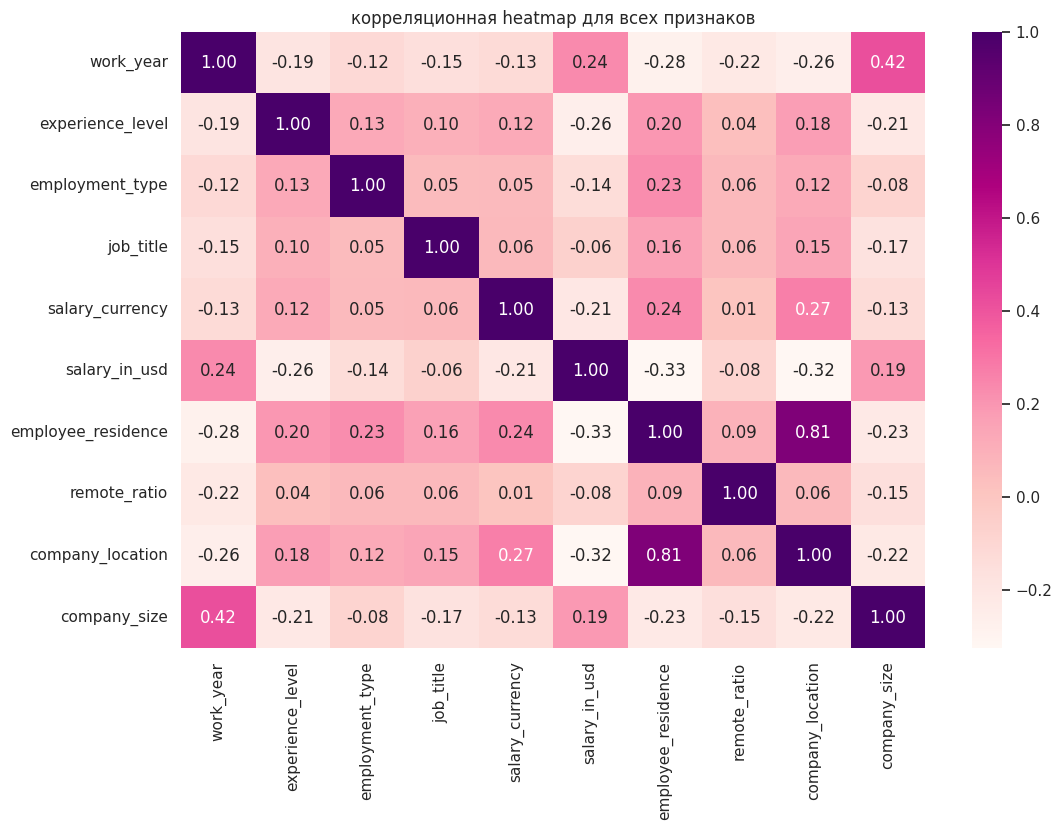

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(X_cor.corr(), annot=True, fmt=".2f", cmap='RdPu')
plt.title('корреляционная heatmap для всех признаков')
plt.show()

чтобы сделать более точные выводы, создадим корреляционные матрицы для каждого признака

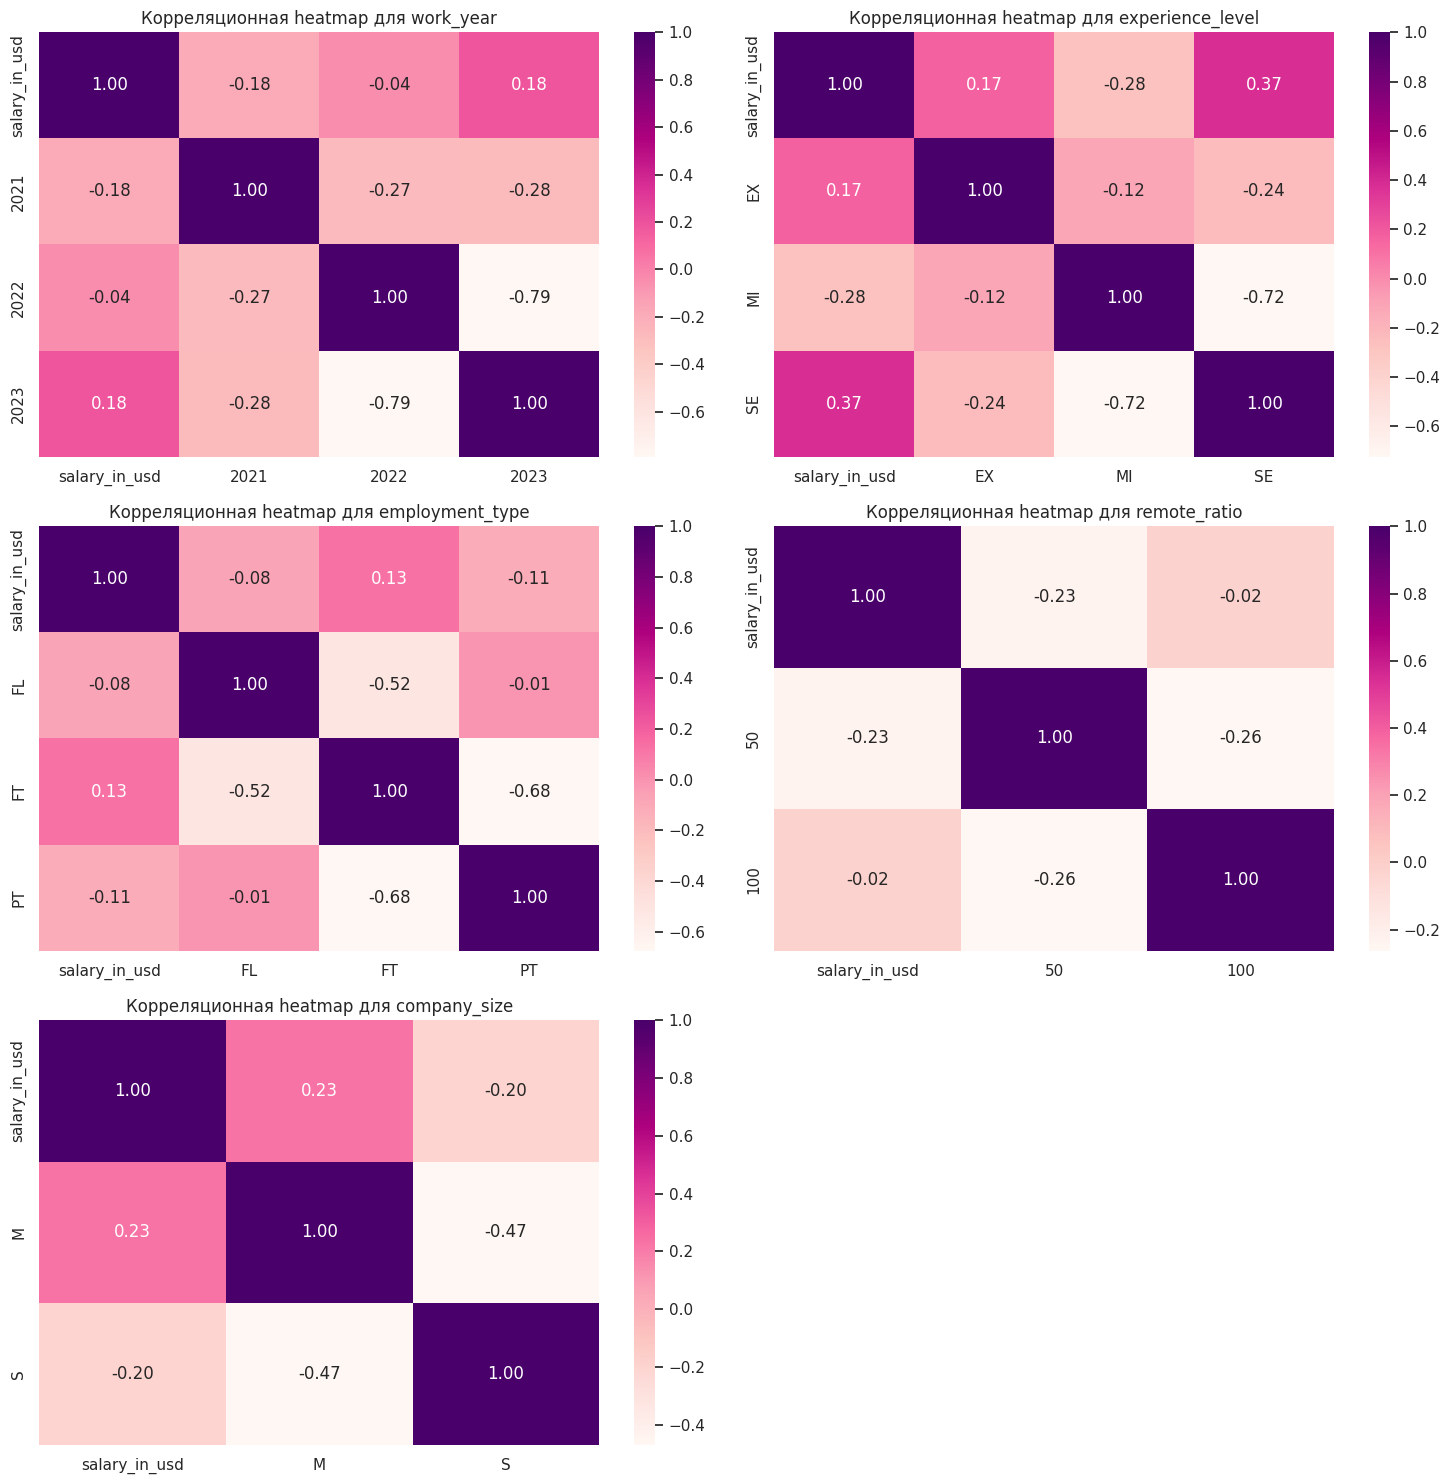

In [ ]:
features = ['work_year', 'experience_level', 'employment_type', 'remote_ratio', 'company_size']

num_plots = len(features)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

for i, label in enumerate(features):
    row = i // num_cols
    col = i % num_cols

    X_feat = df[['salary_in_usd', label]]
    encoded_features = pd.get_dummies(X_feat[label], drop_first=True)
    X_feat = pd.concat([X_feat.drop(columns=[label]), encoded_features], axis=1)

    ax = axs[row, col]
    sns.heatmap(X_feat.corr(), annot=True, fmt=".2f", cmap='RdPu', ax=ax)
    ax.set_title(f'Корреляционная heatmap для {label}')

if num_plots % 2 != 0:
    fig.delaxes(axs[num_rows-1, num_cols-1])

plt.tight_layout()
plt.show()

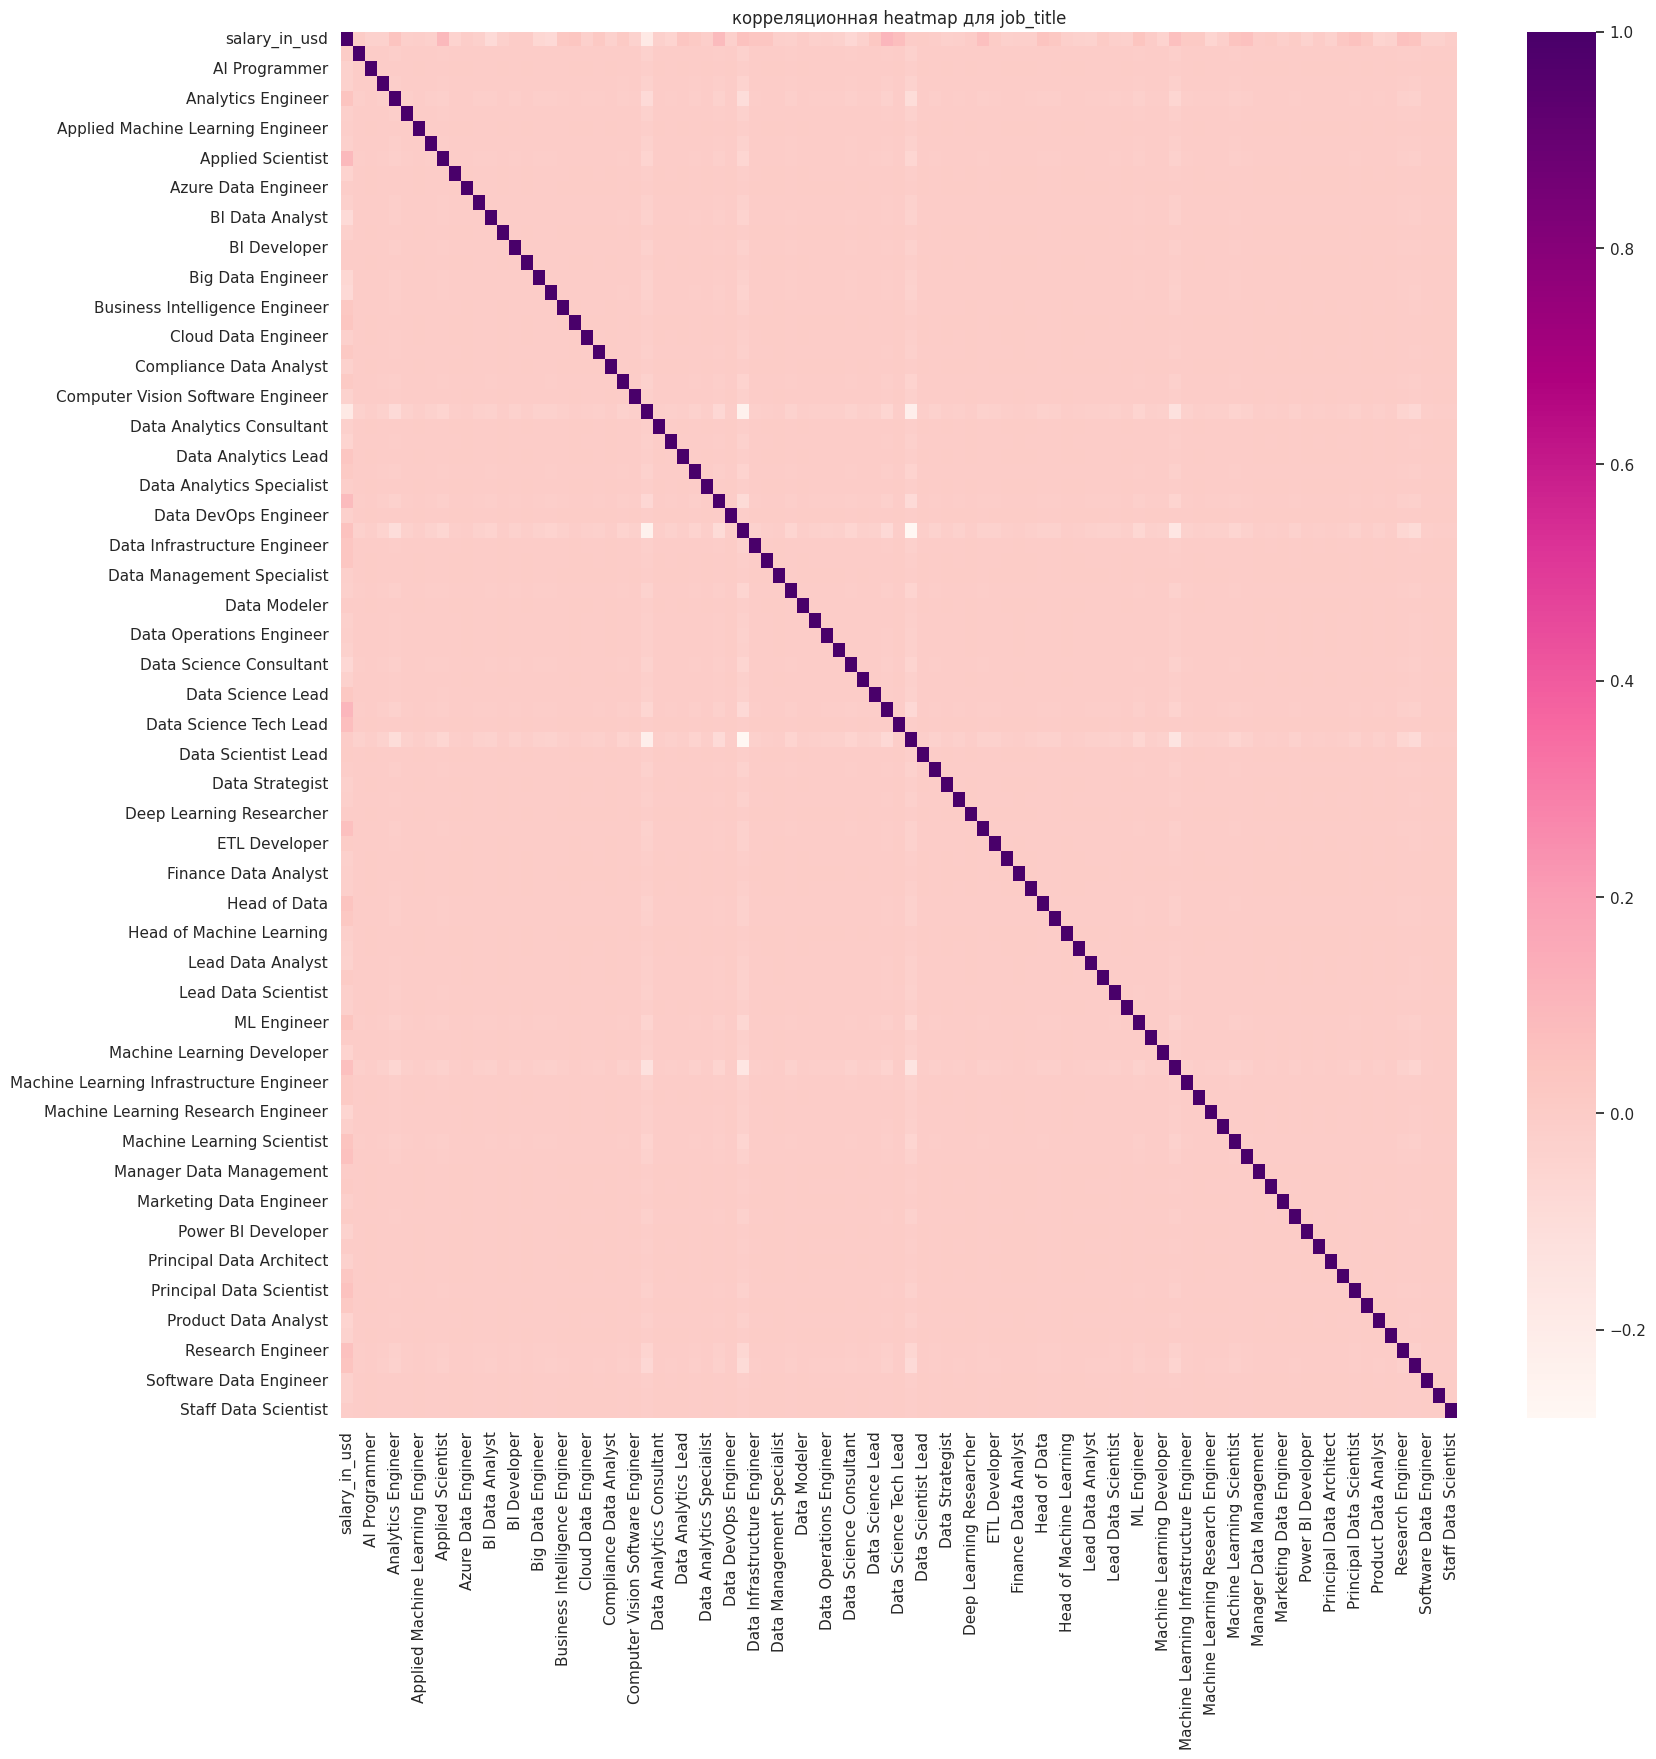

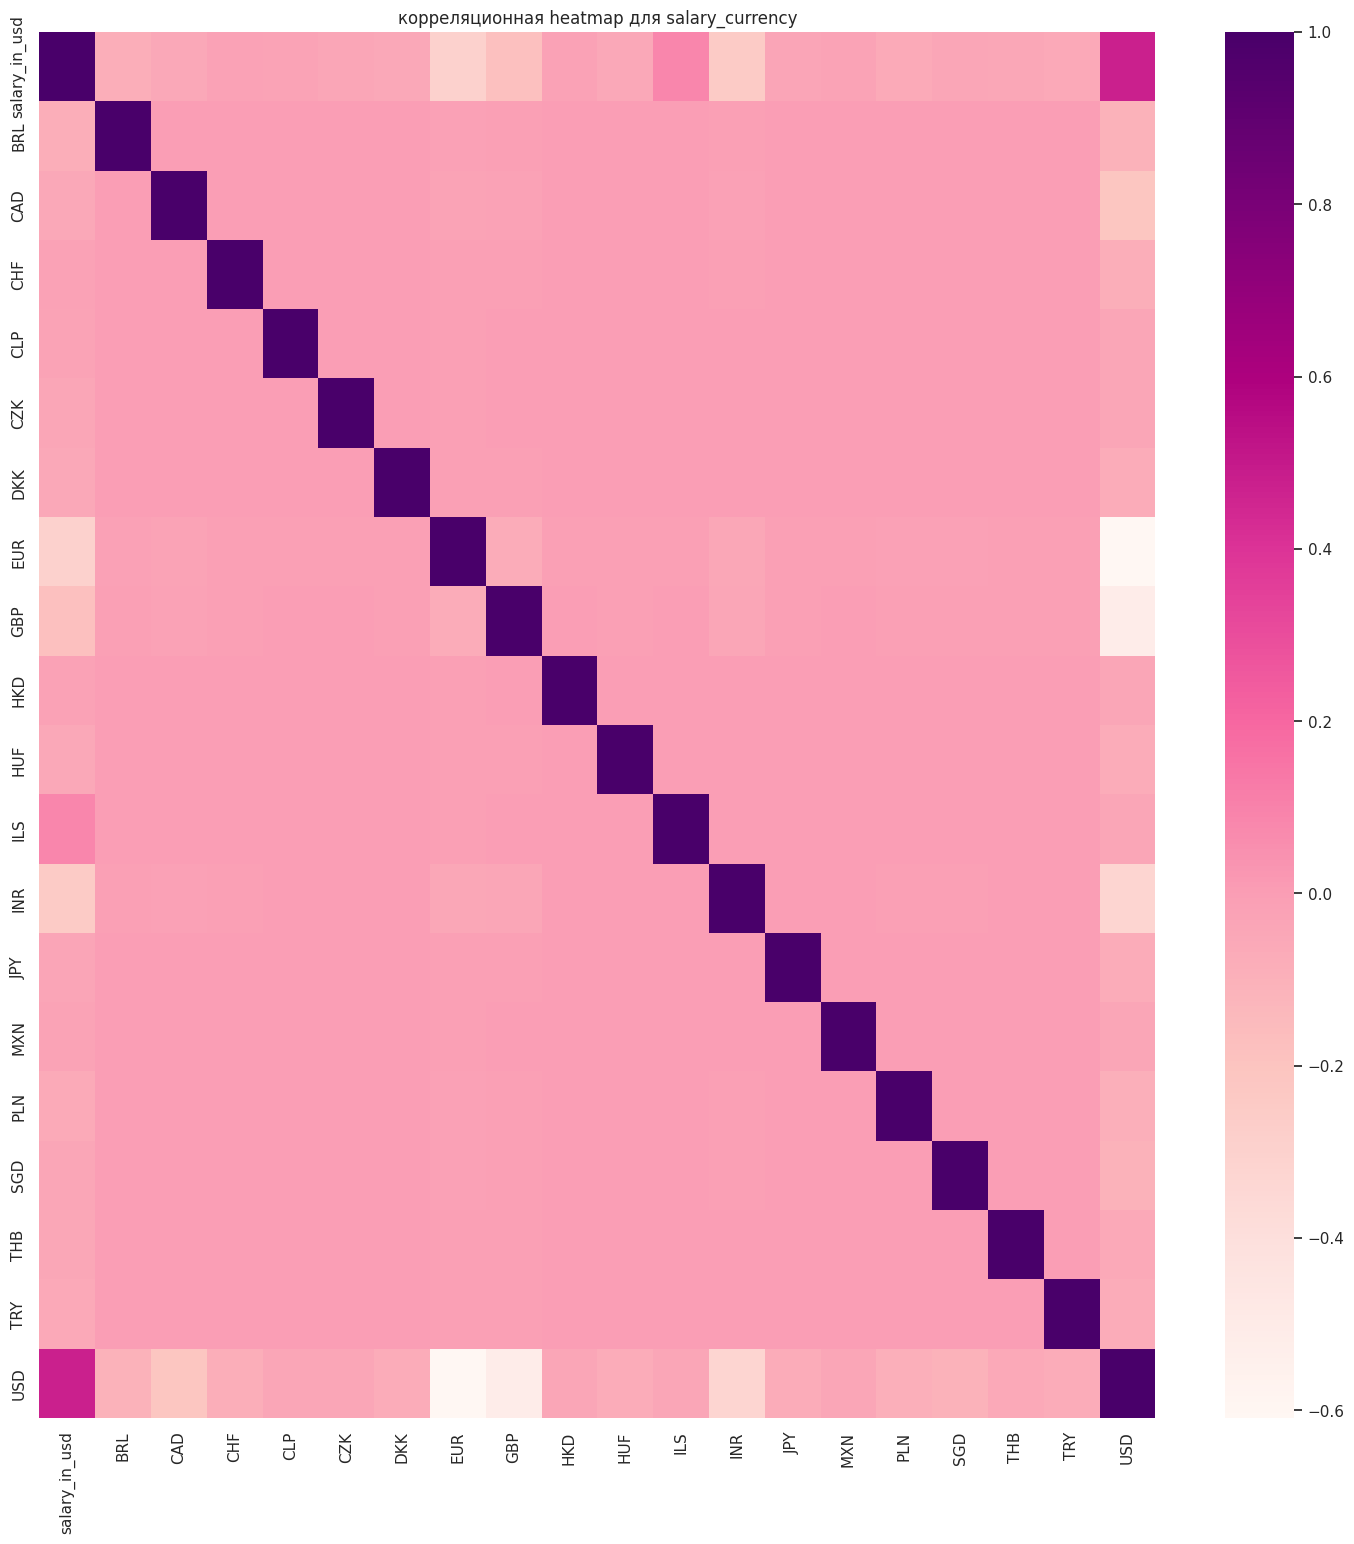

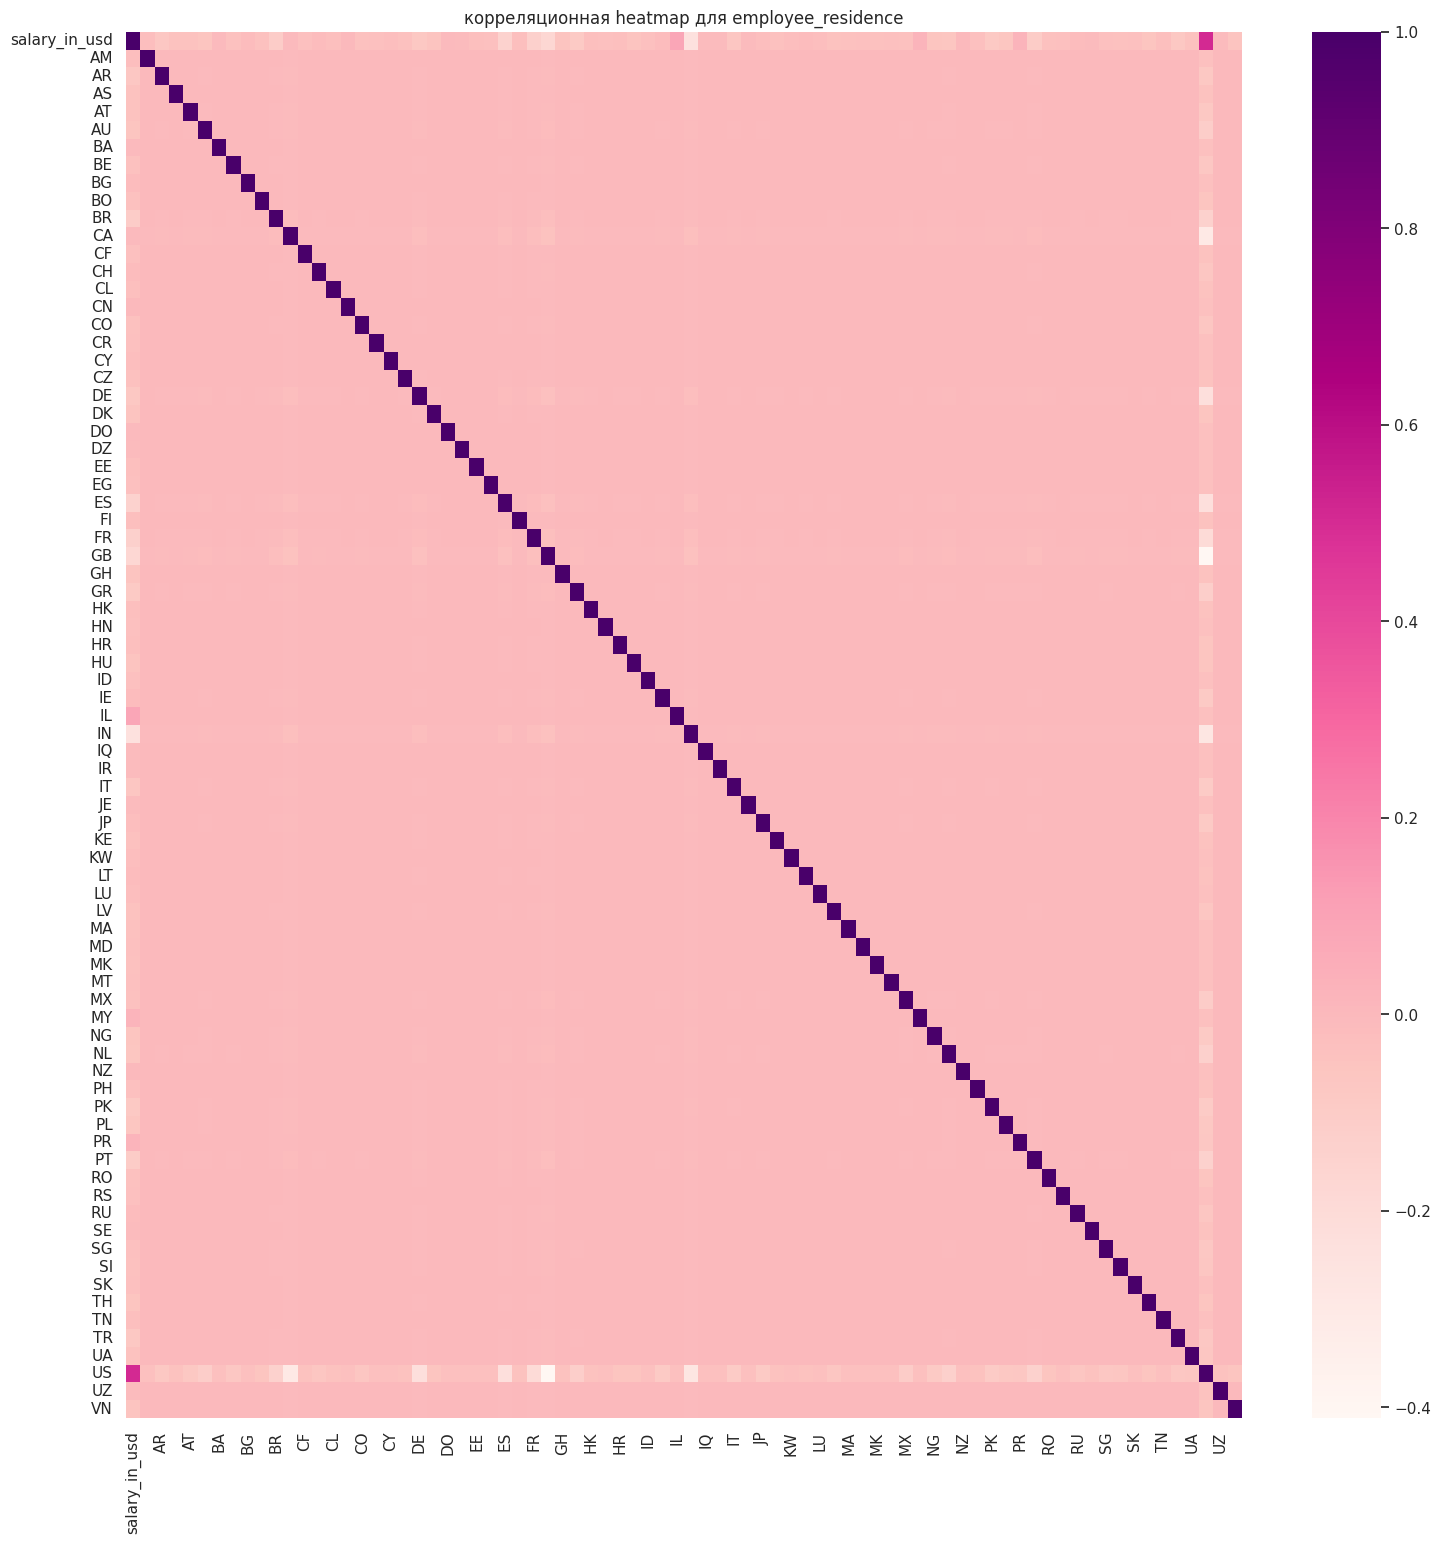

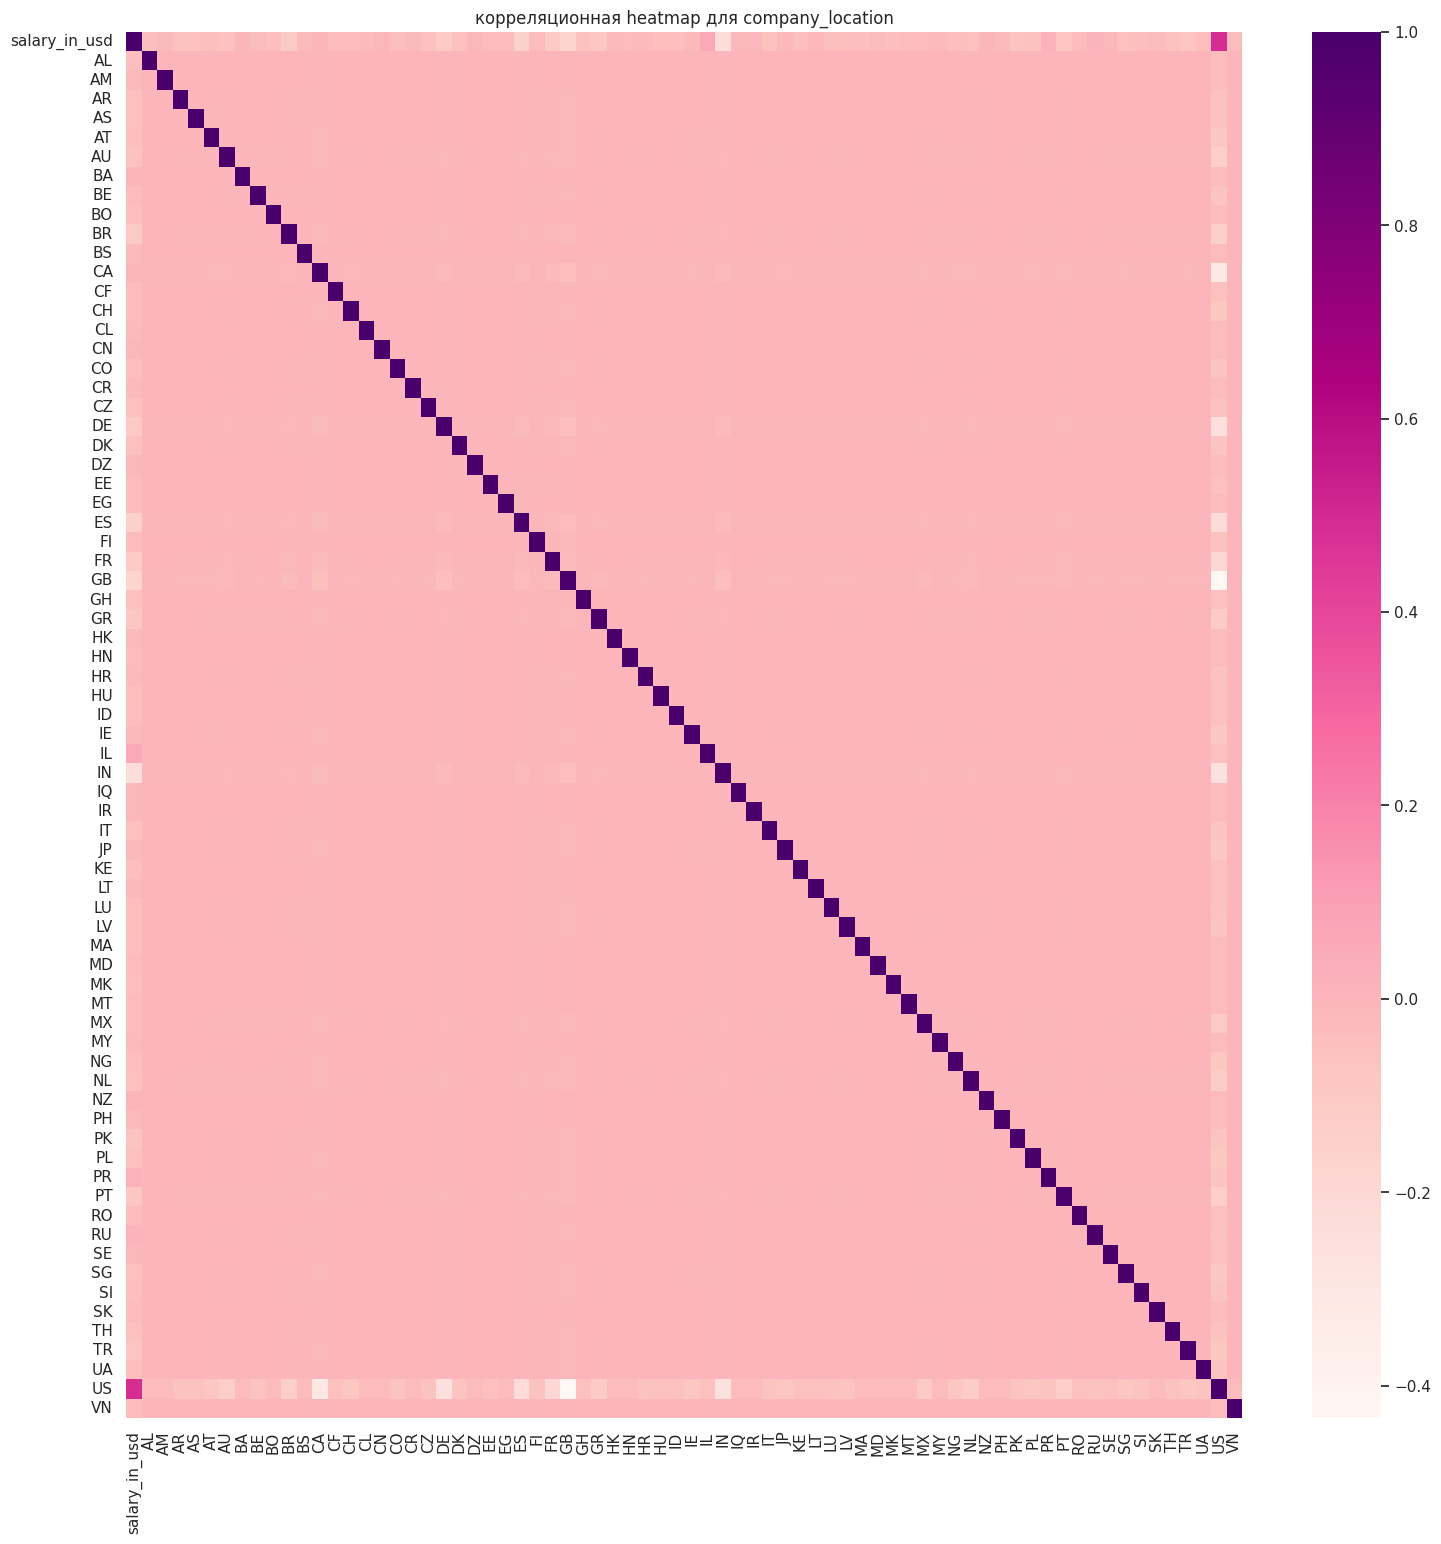

In [ ]:
features = ['job_title',	'salary_currency',	'employee_residence',	'company_location']
for label in features:
  X_feat = df[['salary_in_usd', label]]
  encoded_features = pd.get_dummies(X_feat[label], drop_first=True)
  X_feat = pd.concat([X_feat.drop(columns=[label]), encoded_features], axis=1)
  plt.figure(figsize=(18, 18))
  sns.heatmap(X_feat.corr(), annot=False, fmt=".2f", cmap='RdPu')
  plt.title(f'корреляционная heatmap для {label}')
  plt.show()

# Подготовка данных и разделение на выборки

In [ ]:
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

target = 'salary_in_usd'
y_train = train_df[target]
y_val = val_df[target]
y_test = test_df[target]

X_train = train_df.drop(columns=[target])
X_val = val_df.drop(columns=[target])
X_test = test_df.drop(columns=[target])

print(X_train.shape, X_val.shape, X_test.shape)

(2067, 9) (258, 9) (259, 9)


In [ ]:
X_train.head()

,work_year,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size
25,2023,SE,FT,Business Intelligence Engineer,USD,US,0,US,M
2647,2022,MI,FT,Data Manager,USD,US,0,US,M
2624,2022,SE,FT,Data Analyst,USD,US,0,US,M
2565,2022,SE,FT,Data Analyst,USD,US,100,US,M
2390,2022,MI,FT,Data Engineer,USD,US,0,US,M


In [ ]:
X_test.head()

,work_year,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size
3026,2022,MI,FT,BI Data Analyst,EUR,DE,100,DE,S
3627,2021,EN,FT,Data Scientist,USD,US,100,US,M
3226,2022,MI,FT,Data Engineer,USD,US,0,US,M
136,2023,MI,FT,Data Engineer,USD,US,100,US,M
178,2023,SE,FT,Data Engineer,USD,US,0,US,M


In [ ]:
X_val.head()

,work_year,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size
503,2023,SE,FT,Data Engineer,USD,US,0,US,M
3543,2021,MI,FT,Data Analytics Engineer,USD,US,100,US,L
646,2023,SE,FT,Data Engineer,USD,US,100,US,M
2040,2022,SE,FT,Data Specialist,USD,US,0,US,M
424,2023,SE,FT,Data Engineer,USD,US,0,US,M


In [ ]:
X_train = encoder.fit_transform(X_train)
X_val = encoder.transform(X_val)
X_test = encoder.transform(X_test)

# Обучение моделей регрессии

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostRegressor
import time
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

params = {
    'depth' : range(2,9),
    'learning_rate': [0.1, 0.3, 0.5, 1],
    'iterations' : range(22, 34, 2),
    'l2_leaf_reg' : np.linspace(0.2, 1, 5),
}

catboost_model = GridSearchCV(estimator=CatBoostRegressor(), param_grid=params, scoring='neg_mean_squared_error')

start_time = time.time()
catboost_model.fit(X_train, y_train, verbose=False, eval_set= [(X_val, y_val)])
training_time_catboost = time.time() - start_time

start_time = time.time()
y_pred = catboost_model.predict(X_test)
prediction_time_catboost = time.time() - start_time

mape_catboost = mean_absolute_percentage_error(y_test, y_pred)
rmse_catboost = mean_squared_error(y_test, y_pred, squared=False)

In [ ]:
print('время обучения: ', training_time_catboost)
print('время предсказания: ', prediction_time_catboost)
print('MAPE: ', mape_catboost)
print('RMSE: ', rmse_catboost)
print()
print(catboost_model.best_params_)

время обучения:  558.58815741539
время предсказания:  0.0040776729583740234
MAPE:  0.4146678965375817
RMSE:  44132.669954608085

{'depth': 6, 'iterations': 32, 'l2_leaf_reg': 1.0, 'learning_rate': 1}




---



In [ ]:
from sklearn.ensemble import RandomForestRegressor

params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_model = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=params, scoring='neg_mean_squared_error', cv=5)

start_time = time.time()
rf_model.fit(X_train, y_train)
training_time_rf = time.time() - start_time

start_time = time.time()
y_pred = catboost_model.predict(X_test)
prediction_time_rf = time.time() - start_time

mape_rf = mean_absolute_percentage_error(y_test, y_pred)
rmse_rf = mean_squared_error(y_test, y_pred, squared=False)

In [ ]:
print('время обучения: ', training_time_rf)
print('время предсказания: ', prediction_time_rf)
print('MAPE: ', mape_rf)
print('RMSE: ', rmse_rf)
print()
print(rf_model.best_params_)

время обучения:  1924.5065908432007
время предсказания:  0.0027968883514404297
MAPE:  0.32432817799422237
RMSE:  50784.76926185852

{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}




---



In [ ]:
from lightgbm import LGBMRegressor

params = {
    'depth' : range(2,9),
    'learning_rate': [0.1, 0.3, 0.5, 1],
    'n_estimators' : range(50, 250, 59),
    'reg_lambda' : np.linspace(0.2, 1, 5),
}

lgbm_model = GridSearchCV(estimator=LGBMRegressor(), param_grid=params, scoring='neg_mean_squared_error')

start_time = time.time()
lgbm_model.fit(X_train, y_train, eval_set= [(X_val, y_val)])
training_time_lgbm = time.time() - start_time

start_time = time.time()
y_test_pred = lgbm_model.predict(X_test)
prediction_time_lgbm = time.time() - start_time

mape_lgbm = mean_absolute_percentage_error(y_test, y_test_pred)
rmse_lgbm = mean_squared_error(y_test, y_test_pred, squared=False)

In [ ]:
print('время обучения: ', training_time_lgbm)
print('время предсказания: ', prediction_time_lgbm)
print('MAPE: ', mape_lgbm)
print('RMSE: ', rmse_lgbm)
print()
print(lgbm_model.best_params_)

время обучения:  502.0789725780487
время предсказания:  0.005740165710449219
MAPE:  0.44902987787804033
RMSE:  52581.17812297814

{'depth': 2, 'learning_rate': 0.1, 'n_estimators': 50, 'reg_lambda': 1.0}




---



In [ ]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

start_time = time.time()
lr_model.fit(X_train, y_train)
training_time_lr = time.time() - start_time

start_time = time.time()
y_pred = lr_model.predict(X_test)
prediction_time_lr = time.time() - start_time

mape_lr = mean_absolute_percentage_error(y_test, y_pred)
rmse_lr = mean_squared_error(y_test, y_pred, squared=False)

In [ ]:
print('время обучения: ', training_time_lr)
print('время предсказания: ', prediction_time_lr)
print('MAPE: ', mape_lr)
print('RMSE: ', rmse_lr)

время обучения:  0.10368084907531738
время предсказания:  0.0004706382751464844
MAPE:  0.6608786422776746
RMSE:  51571.182848877244




---



In [ ]:
from sklearn.linear_model import Ridge, Lasso
params = {'alpha': [0.01, 0.1, 1, 10, 100, 1000, 10000]}

In [ ]:
lasso_model = GridSearchCV(estimator=Lasso(), param_grid=params, scoring='neg_mean_squared_error', cv=5)

start_time = time.time()
lasso_model.fit(X_train, y_train)
training_time_lasso = time.time() - start_time

start_time = time.time()
y_pred_lasso = lasso_model.predict(X_test.toarray())
prediction_time_lasso = time.time() - start_time

mape_lasso = mean_absolute_percentage_error(y_test, y_pred_lasso)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)

In [ ]:
print('время обучения: ', training_time_lasso)
print('время предсказания: ', prediction_time_lasso)
print('MAPE: ', mape_lasso)
print('RMSE: ', rmse_lasso)
print()
print(lasso_model.best_params_)

время обучения:  24.562447786331177
время предсказания:  0.006451845169067383
MAPE:  0.39777872166649625
RMSE:  43672.672847206915

{'alpha': 100}


In [ ]:
ridge_model = GridSearchCV(estimator=Ridge(), param_grid=params, scoring='neg_mean_squared_error', cv=5)

start_time = time.time()
ridge_model.fit(X_train, y_train)
training_time_ridge = time.time() - start_time

start_time = time.time()
y_pred_ridge = ridge_model.predict(X_test.toarray())
prediction_time_ridge = time.time() - start_time

mape_ridge = mean_absolute_percentage_error(y_test, y_pred_ridge)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)

In [ ]:
print('время обучения: ', training_time_ridge)
print('время предсказания: ', prediction_time_ridge)
print('MAPE: ', mape_ridge)
print('RMSE: ', rmse_ridge)
print()
print(ridge_model.best_params_)

время обучения:  0.08821630477905273
время предсказания:  0.0018849372863769531
MAPE:  0.4756752175670925
RMSE:  49682.45761358489

{'alpha': 100}




---



In [ ]:
alphas = [0.01, 0.1, 1, 10, 100, 1000, 10000]
rmse_lasso_array = []
rmse_ridge_array = []
mape_lasso_array = []
mape_ridge_array = []

for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    y_pred_lasso = lasso_model.predict(X_test)
    rmse_lasso_array.append(mean_squared_error(y_test, y_pred_lasso, squared=False))
    mape_lasso_array.append(mean_absolute_percentage_error(y_test, y_pred_lasso))

    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    y_pred_ridge = ridge_model.predict(X_test)
    rmse_ridge_array.append(mean_squared_error(y_test, y_pred_ridge, squared=False))
    mape_ridge_array.append(mean_absolute_percentage_error(y_test, y_pred_ridge))

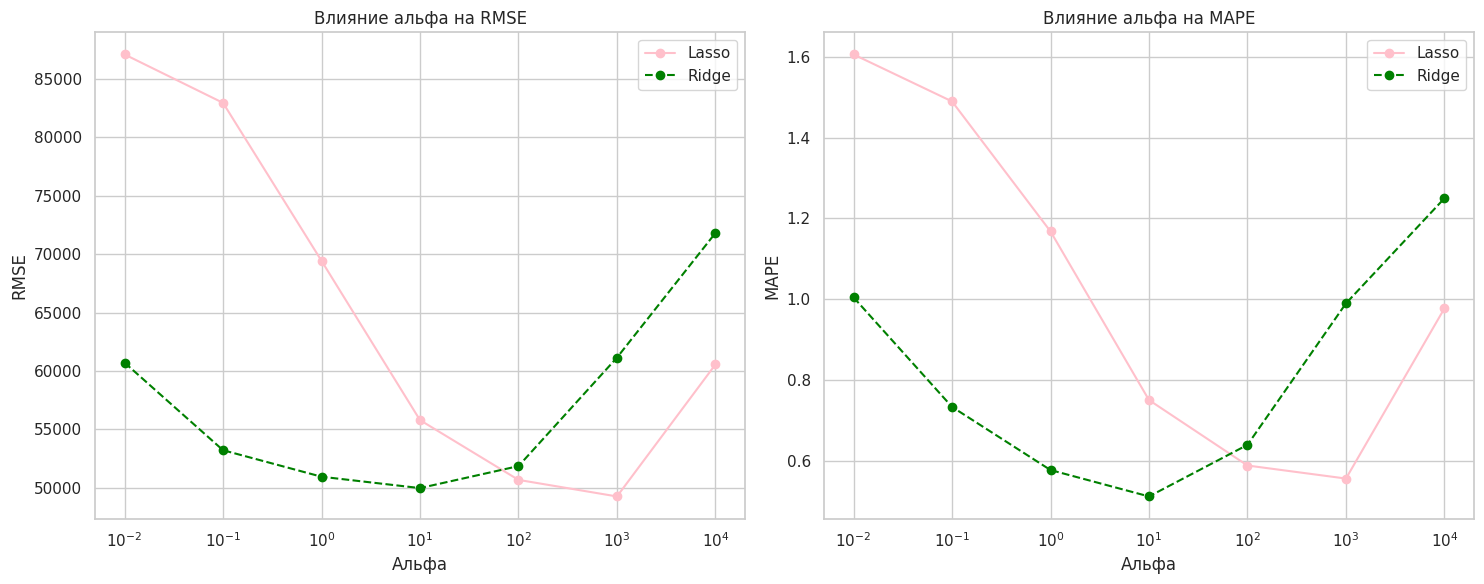

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].plot(alphas, rmse_lasso_array, label='Lasso', marker='o', linestyle='-', color='pink')
axs[0].plot(alphas, rmse_ridge_array, label='Ridge', marker='o', linestyle='--', color='green')
axs[0].set_xscale('log')
axs[0].set_xlabel('Альфа')
axs[0].set_ylabel('RMSE')
axs[0].set_title('Влияние альфа на RMSE')
axs[0].legend()

axs[1].plot(alphas, mape_lasso_array, label='Lasso', marker='o', linestyle='-', color='pink')
axs[1].plot(alphas, mape_ridge_array, label='Ridge', marker='o', linestyle='--', color='green')
axs[1].set_xscale('log')
axs[1].set_xlabel('Альфа')
axs[1].set_ylabel('MAPE')
axs[1].set_title('Влияние альфа на MAPE')
axs[1].legend()

plt.grid
plt.tight_layout()
plt.show()



---



In [ ]:
results = {
    'модель': ['CatBoostRegressor', 'RandomForestRegressor', 'LGBMRegressor', 'LinearRegression', 'LinearRegression(ridge)', 'LinearRegression(lasso)'],
    'время обучения (сек)': [training_time_catboost, training_time_rf, training_time_lgbm, training_time_lr, training_time_ridge, training_time_lasso],
    'время предсказания (сек)': [prediction_time_catboost, prediction_time_rf, prediction_time_lgbm, prediction_time_lr, prediction_time_ridge, prediction_time_lasso],
    'RMSE': [rmse_catboost, rmse_rf, rmse_lgbm, rmse_lr, rmse_ridge, rmse_lasso],
    'MAPE': [mape_catboost, mape_rf, mape_lgbm, mape_lr, mape_ridge, mape_lasso]
}
results_df = pd.DataFrame(results)
results_df

,модель,время обучения (сек),время предсказания (сек),RMSE,MAPE
0,CatBoostRegressor,558.588157,0.004078,44132.669955,0.414668
1,RandomForestRegressor,1924.506591,0.002797,50784.769262,0.324328
2,LGBMRegressor,502.078973,0.005740,52581.178123,0.449030
3,LinearRegression,0.103681,0.000471,51571.182849,0.660879
4,LinearRegression(ridge),0.088216,0.001885,49682.457614,0.475675
5,LinearRegression(lasso),24.562448,0.006452,43672.672847,0.397779


# Дополнительные исследования

In [ ]:
optimal_rf = RandomForestRegressor(n_estimators=200, max_depth=20, min_samples_leaf=2, min_samples_split=10)
optimal_rf.fit(X_train, y_train)

feature_importances = optimal_rf.feature_importances_

feature_names = encoder.get_feature_names_out(X.columns)

sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

top_feature_importances = sorted_feature_importances[:10]
top_feature_names = sorted_feature_names[:10]

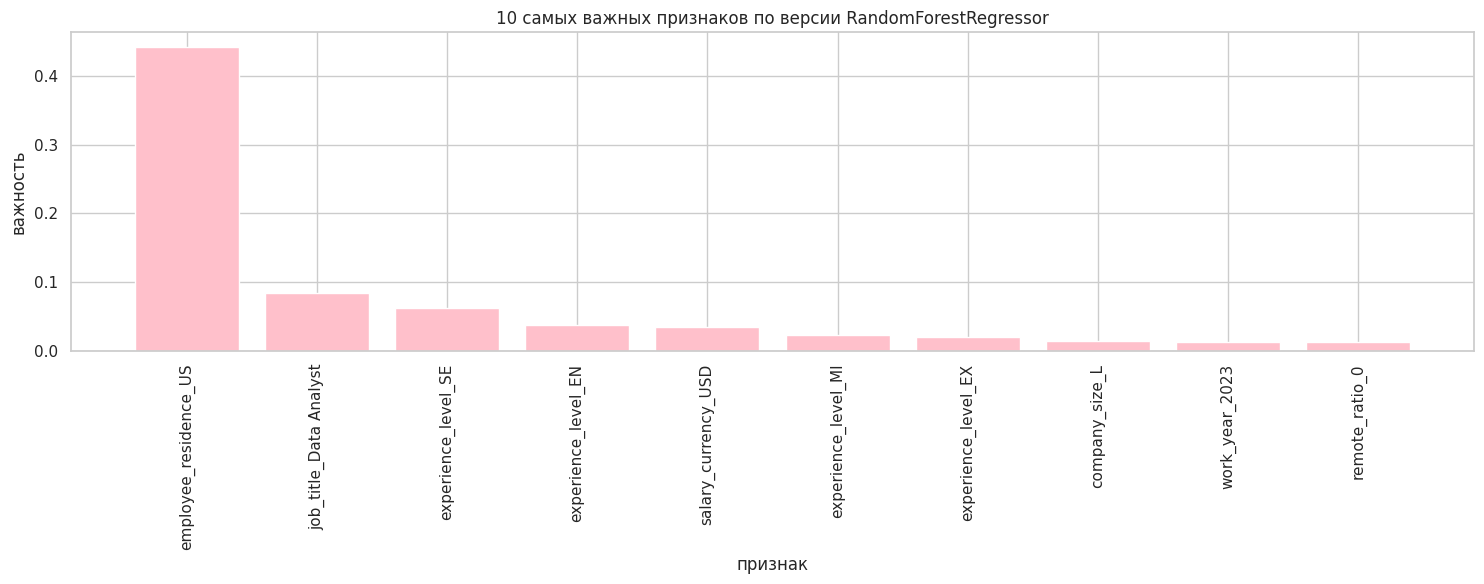

In [ ]:
plt.figure(figsize=(15, 6))
plt.bar(range(10), top_feature_importances, tick_label=top_feature_names, color='pink')
plt.xlabel('признак')
plt.ylabel('важность')
plt.xticks(rotation=90)
plt.title('10 самых важных признаков по версии RandomForestRegressor')
plt.tight_layout()
plt.show()



---



In [ ]:
optimal_catboost = CatBoostRegressor(depth = 6, iterations = 32, l2_leaf_reg=1.0, learning_rate=1)
optimal_catboost.fit(X_train, y_train)

feature_importances = optimal_catboost.feature_importances_

feature_names = encoder.get_feature_names_out(X.columns)

sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

top_feature_importances = sorted_feature_importances[:10]
top_feature_names = sorted_feature_names[:10]

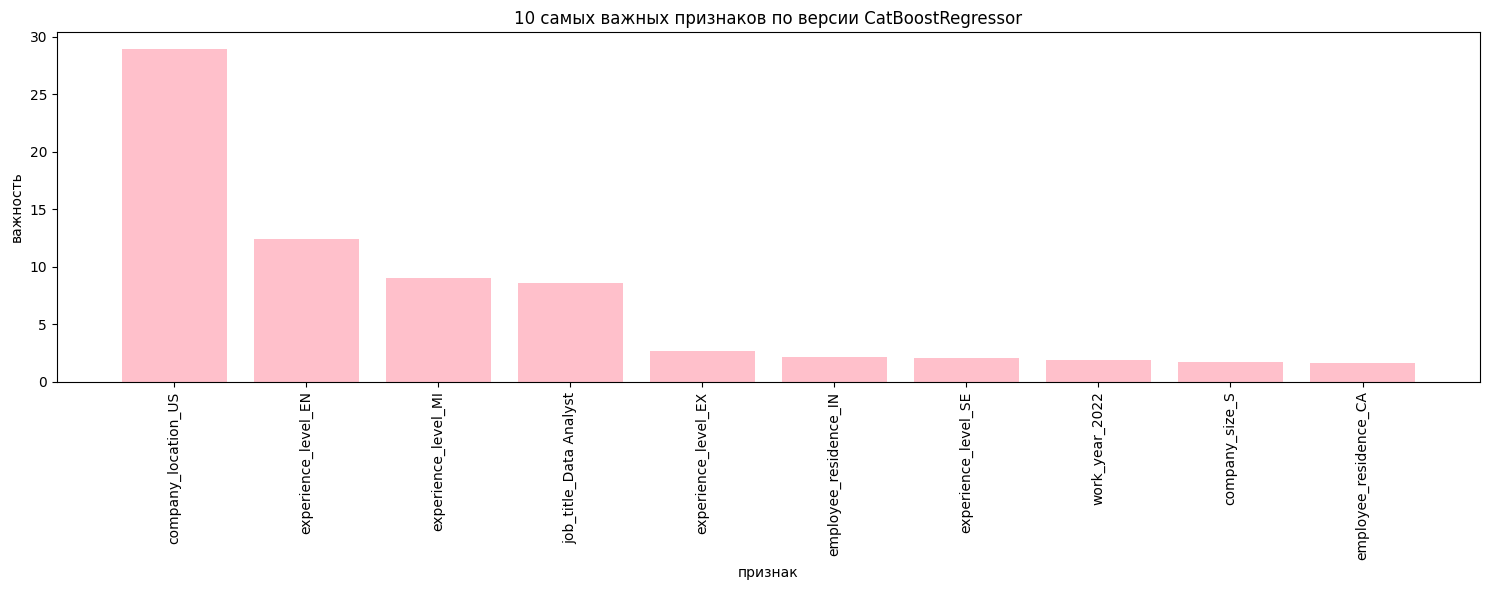

In [ ]:
plt.figure(figsize=(15, 6))
plt.bar(range(10), top_feature_importances, tick_label=top_feature_names, color='pink')
plt.xlabel('признак')
plt.ylabel('важность')
plt.xticks(rotation=90)
plt.title('10 самых важных признаков по версии CatBoostRegressor')
plt.tight_layout()
plt.show()

In [ ]:
optimal_lgbm = LGBMRegressor(depth = 2, n_estimators = 50, reg_lambda = 1.0, learning_rate=0.1)
optimal_lgbm.fit(X_train, y_train)

feature_importances = optimal_lgbm.feature_importances_

feature_names = encoder.get_feature_names_out(X.columns)

sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

top_feature_importances = sorted_feature_importances[:10]
top_feature_names = sorted_feature_names[:10]

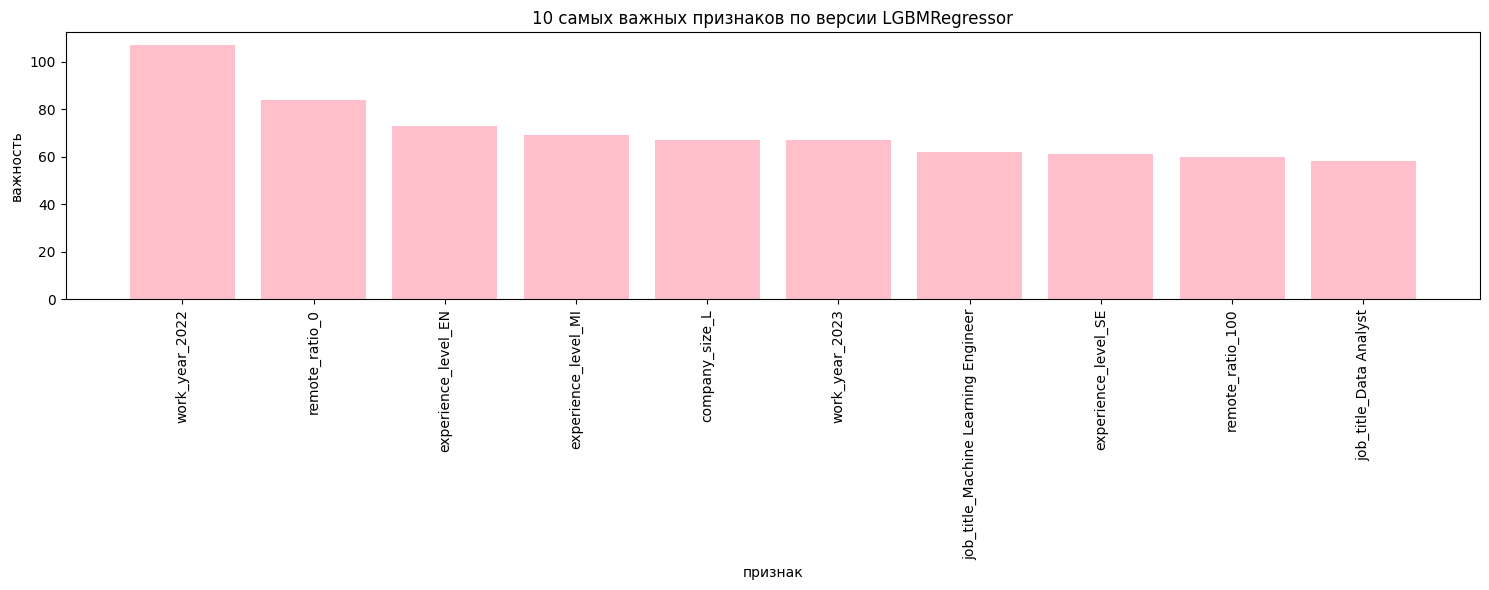

In [ ]:
plt.figure(figsize=(15, 6))
plt.bar(range(10), top_feature_importances, tick_label=top_feature_names, color='pink')
plt.xlabel('признак')
plt.ylabel('важность')
plt.xticks(rotation=90)
plt.title('10 самых важных признаков по версии LGBMRegressor')
plt.tight_layout()
plt.show()